In [7]:
from ultralytics import SAM
import cv2
import numpy as np
import matplotlib.pyplot as plt
import torch

class ImageSegmentationTool:
    def __init__(self, model_path='mobile_sam.pt', device='cuda'):
        """
        Initialize the segmentation tool with GPU support
        Args:
            model_path: Path to MobileSAM weights
            device: 'cuda' for GPU, 'cpu' for CPU, or specific GPU like 'cuda:0'
        """
        # Check if CUDA is available
        if device == 'cuda' and not torch.cuda.is_available():
            print("CUDA not available, falling back to CPU")
            device = 'cpu'
        
        self.device = device
        self.model = SAM(model_path)
        print(f"Model loaded on: {device}")
        print(f"GPU: {torch.cuda.get_device_name(0) if torch.cuda.is_available() else 'None'}")
    
    def segment_with_points(self, image_path, points, labels):
        """GPU-accelerated point-based segmentation"""
        results = self.model.predict(
            image_path, 
            points=points, 
            labels=labels,
            retina_masks=True,
            device=self.device  # Specify GPU device
        )
        return results[0].masks.data.cpu().numpy()
    
    def segment_with_box(self, image_path, bbox):
        """GPU-accelerated box-based segmentation"""
        results = self.model.predict(
            image_path, 
            bboxes=[bbox],
            device=self.device,
            retina_masks=True
        )
        return results[0].masks.data.cpu().numpy()
    
    def segment_everything(self, image_path, conf=0.4, iou=0.9):
        """GPU-accelerated automatic segmentation"""
        results = self.model(
            image_path,
            device=self.device,
            conf=conf,
            iou=iou,
            retina_masks=True  # Higher quality masks
        )
        return results[0].masks.data.cpu().numpy()
    
    def visualize_masks(self, image_path, masks, output_path='output.png'):
        """
        Visualize segmentation masks overlaid on original image
        """
        image = cv2.imread(image_path)
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
        
        plt.figure(figsize=(12, 8))
        plt.imshow(image)
        
        # Overlay each mask with different color
        for i, mask in enumerate(masks):
            color = np.array([255,0,0])
            h, w = mask.shape
            mask_image = mask.reshape(h, w, 1) * color.reshape(1, 1, -1)
            plt.imshow(mask_image, alpha=0.7)
        
        plt.axis('off')
        plt.show()
        # plt.savefig(output_path, bbox_inches='tight', dpi=150)
        # plt.close()
        
        return output_path


# Initialize segmentation tool
seg_tool = ImageSegmentationTool(model_path='mobile_sam.pt')


CUDA not available, falling back to CPU
Model loaded on: cpu
GPU: None


image 1/1 c:\Users\ayush\OneDrive\Desktop\adobe_mock\easy_input.jpg: 1024x1024 1 0, 772.3ms
Speed: 10.2ms preprocess, 772.3ms inference, 21.8ms postprocess per image at shape (1, 3, 1024, 1024)


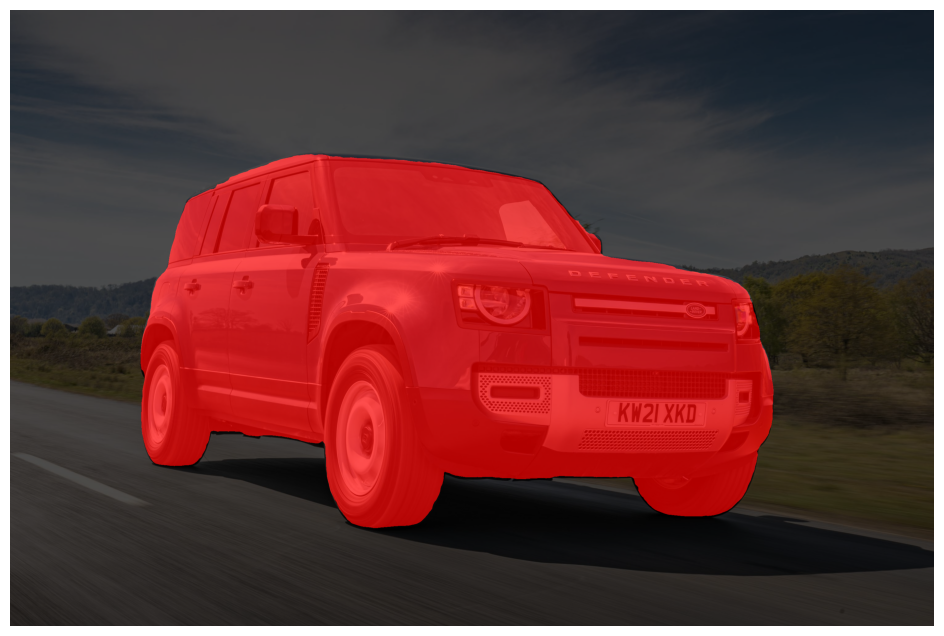

'easy_output.png'

In [8]:
bbox = [430, 450, 2580, 1770]
masks1 = seg_tool.segment_with_box('easy_input.jpg', bbox)
seg_tool.visualize_masks('easy_input.jpg', masks1, 'easy_output.png')



image 1/1 c:\Users\ayush\OneDrive\Desktop\adobe_mock\complex_edges1.jpg: 1024x1024 1 0, 806.9ms
Speed: 9.5ms preprocess, 806.9ms inference, 10.3ms postprocess per image at shape (1, 3, 1024, 1024)


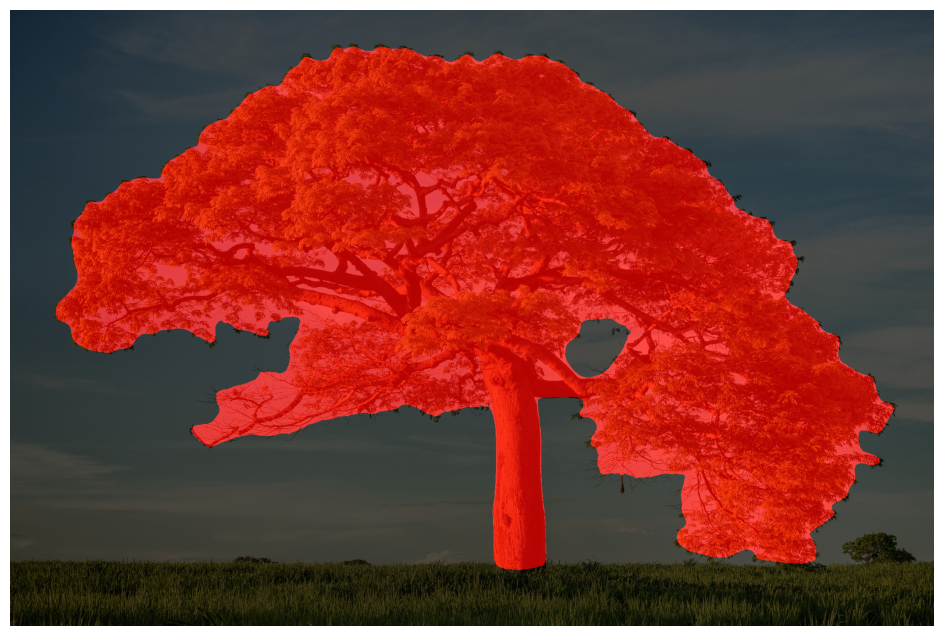

'complex_edges_output.png'

In [9]:
bbox = [30, 30, 1840, 1102] 
masks2 = seg_tool.segment_with_box('complex_edges1.jpg', bbox)
seg_tool.visualize_masks('complex_edges1.jpg', masks2, 'complex_edges_output.png')


image 1/1 c:\Users\ayush\OneDrive\Desktop\adobe_mock\ambiguity.jpg: 1024x1024 1 0, 749.1ms
Speed: 11.0ms preprocess, 749.1ms inference, 3.8ms postprocess per image at shape (1, 3, 1024, 1024)


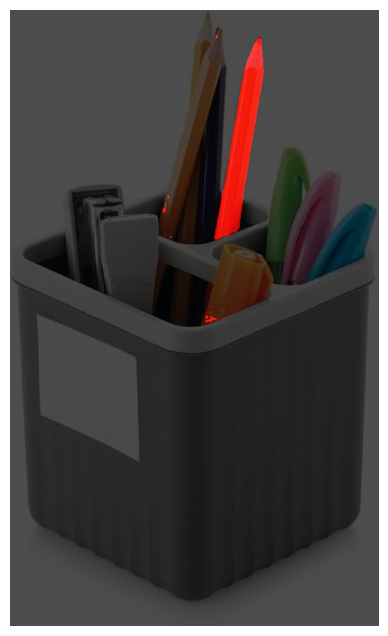

'ambiguity_output.png'

In [10]:
points = [[373, 204]] 
labels = [1] 
masks3 = seg_tool.segment_with_points('ambiguity.jpg', points, labels)
seg_tool.visualize_masks('ambiguity.jpg', masks3, 'ambiguity_output.png')


image 1/1 c:\Users\ayush\OneDrive\Desktop\adobe_mock\ambiguity.jpg: 1024x1024 1 0, 738.9ms
Speed: 9.0ms preprocess, 738.9ms inference, 3.2ms postprocess per image at shape (1, 3, 1024, 1024)


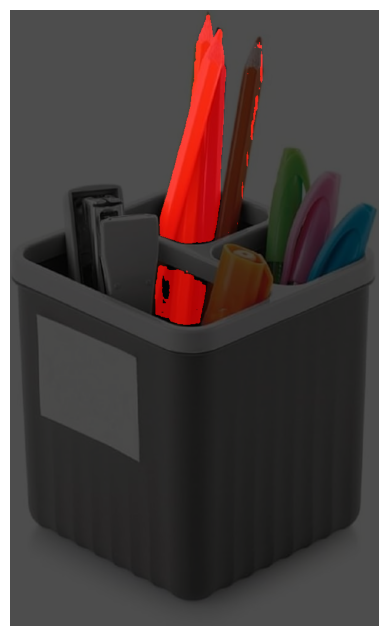

'ambiguity_output.png'

In [11]:
points = [[292, 331]]  
labels = [1] 
masks3 = seg_tool.segment_with_points('ambiguity.jpg', points, labels)
seg_tool.visualize_masks('ambiguity.jpg', masks3, 'ambiguity_output.png')